In [54]:
import sys
import pandas as pd
import os
import datetime as dt
import requests
from pathlib import Path
import csv
import config
import json
import binance
from binance import *
from MCForecastTools import MCSimulation

In [2]:
# Bitcoin dataframe from CSV

btc = pd.read_csv(Path("./Resources/Binance_BTCUSDT_d.csv"),
                       index_col = "Date", 
                       parse_dates = True,
                       infer_datetime_format = True)

In [3]:
display(btc.head())

,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,Tradecount
Date,,,,,,,,
2022-03-27,BTC/USDT,44511.27,44591.37,44484.11,44551.52,680.21108,3.029779e+07,22011.0
2022-03-26,BTC/USDT,44313.16,44792.99,44071.97,44511.27,23041.61741,1.022803e+09,693647.0
2022-03-25,BTC/USDT,43991.46,45094.14,43579.00,44313.16,54614.43648,2.421153e+09,1141588.0
2022-03-24,BTC/USDT,42882.76,44220.89,42560.46,43991.46,56195.12374,2.436258e+09,1202541.0
2022-03-23,BTC/USDT,42364.13,43025.96,41751.47,42882.76,40828.87039,1.725787e+09,916671.0


In [4]:
#Ethereum dataframe from CSV

eth = pd.read_csv(Path("./Resources/Binance_ETHUSDT_d.csv"),
                       index_col = "Date", 
                       parse_dates = True,
                       infer_datetime_format = True)

In [5]:
display(eth.head())

,Symbol,Open,High,Low,Close,Volume ETH,Volume USDT,tradecount
Date,,,,,,,,
2022-03-27,ETH/USDT,3145.01,3149.29,3137.29,3140.80,5821.7251,1.829801e+07,11693.0
2022-03-26,ETH/USDT,3102.13,3153.20,3084.90,3145.00,207134.8470,6.465516e+08,403089.0
2022-03-25,ETH/USDT,3110.75,3193.28,3076.00,3102.14,489099.5572,1.532535e+09,745999.0
2022-03-24,ETH/USDT,3035.99,3129.11,2999.11,3110.76,577171.5239,1.768485e+09,853822.0
2022-03-23,ETH/USDT,2969.64,3045.20,2920.65,3036.00,453962.7298,1.350911e+09,813052.0


In [6]:
#Cardano dataframe from CSV

ada = pd.read_csv(Path("./Resources/Binance_ADAUSDT_d.csv"),
                       index_col = "Date", 
                       parse_dates = True,
                       infer_datetime_format = True)

In [7]:
display(ada.head())

,Symbol,Open,High,Low,Close,Volume ADA,Volume USDT,tradecount
Date,,,,,,,,
2022-03-27,ADA/USDT,1.152,1.153,1.142,1.146,4447642.5,5.105312e+06,5742
2022-03-26,ADA/USDT,1.096,1.160,1.079,1.152,143117986.1,1.610243e+08,271206
2022-03-25,ADA/USDT,1.130,1.167,1.072,1.096,290456883.7,3.248026e+08,506738
2022-03-24,ADA/USDT,1.108,1.190,1.076,1.131,390982460.0,4.456513e+08,702338
2022-03-23,ADA/USDT,0.975,1.110,0.957,1.108,362447245.1,3.768365e+08,645078


In [8]:
# Bitcoin closing prices

btc_sliced = btc.loc[:,"Close"]

In [9]:
btc_sliced.head()

Date
2022-03-27    44551.52
2022-03-26    44511.27
2022-03-25    44313.16
2022-03-24    43991.46
2022-03-23    42882.76
Name: Close, dtype: float64

In [10]:
#Ethereum closing prices

eth_sliced = eth.loc[:,"Close"]

In [11]:
eth_sliced.head()

Date
2022-03-27    3140.80
2022-03-26    3145.00
2022-03-25    3102.14
2022-03-24    3110.76
2022-03-23    3036.00
Name: Close, dtype: float64

In [12]:
#Cardano closing prices

ada_sliced = ada.loc[:,"Close"]

In [32]:
ada_sliced.head()

Date
2022-03-27    1.146
2022-03-26    1.152
2022-03-25    1.096
2022-03-24    1.131
2022-03-23    1.108
Name: Close, dtype: float64

In [14]:
# Bitcoin closing summary stats

btc_sliced.describe()

count     1685.000000
mean     18632.151958
std      17623.552024
min       3189.020000
25%       6843.900000
50%       9517.120000
75%      33380.810000
max      67525.830000
Name: Close, dtype: float64

In [15]:
#Ethereum closing summary stats

eth_sliced.describe()

count    1685.000000
mean      992.377068
std      1211.957172
min        83.760000
25%       200.450000
50%       365.500000
75%      1379.500000
max      4807.980000
Name: Close, dtype: float64

In [16]:
#Cardano closing summary stats

ada_sliced.describe()

count    1441.000000
mean        0.501844
std         0.699488
min         0.023290
25%         0.051440
50%         0.100050
75%         1.042000
max         2.966000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Date'>

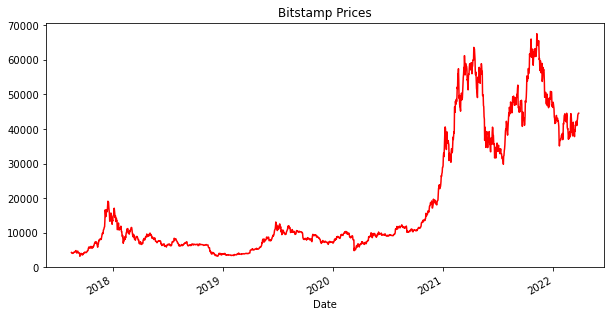

In [17]:
# Bitcoin data plot

btc_sliced.plot(figsize=(10,5), title="Bitcoin Prices", color="red")

<AxesSubplot:title={'center':'Bitcoin Prices'}, xlabel='Date'>

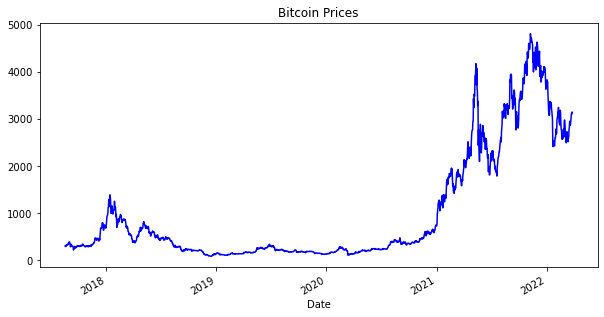

In [29]:
# Ethereum data plot

eth_sliced.plot(figsize=(10,5), title="Bitcoin Prices", color="blue")

<AxesSubplot:title={'center':'Cardano Prices'}, xlabel='Date'>

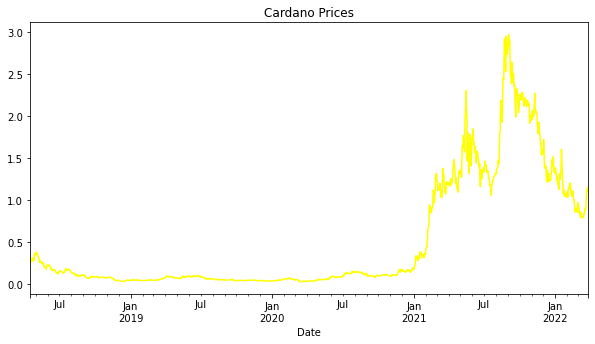

In [30]:
# Cardano data plot

ada_sliced.plot(figsize=(10,5), title="Cardano Prices", color="yellow")

<AxesSubplot:title={'center':'Bitcoin vs Ethereum vs Cardano'}, xlabel='Date'>

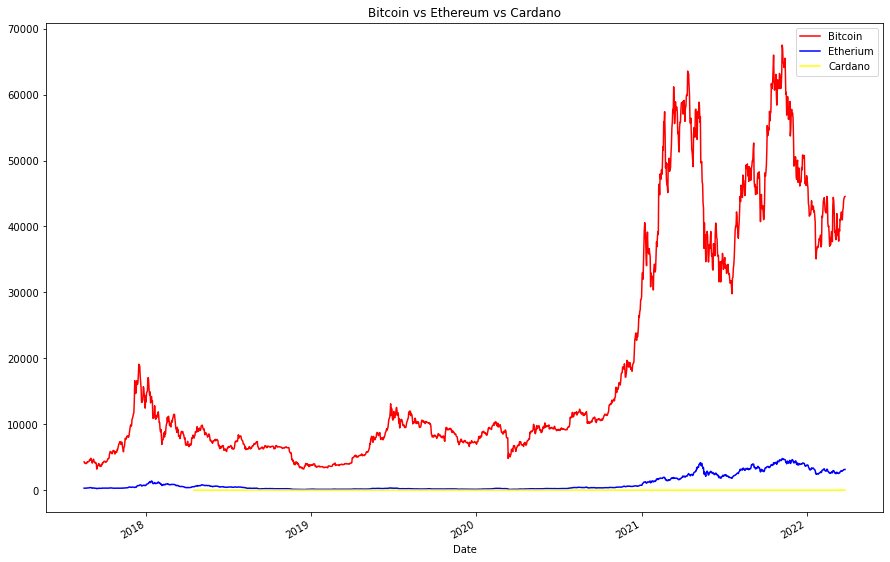

In [31]:
# Bitcoin, Ethereum, and Cardano data plots comparison

btc_sliced.plot(legend=True, figsize=(15,10), title="Bitcoin vs Ethereum vs Cardano", color="red", label="Bitcoin")
eth_sliced.plot(legend=True, figsize=(15,10), color="blue", label="Etherium")
ada_sliced.plot(legend=True, figsize=(15,10), color="yellow", label="Cardano")

In [23]:
#Data from Binance for Ethereum

url = "https://api.binance.com/api/v3/klines"

symbol = 'ETHUSDT'
interval = '1d'
startTime = str(int(dt.datetime(2020, 1, 1).timestamp() * 1000))
endTime = str(int(dt.datetime(2022, 2, 1).timestamp() * 1000))
limit = '1000'

req_params = {'symbol' : symbol, 'interval' : interval, 'startTime' : startTime, 'endTime' : endTime, 'limit' : limit}

In [24]:
df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text))
df = df.iloc[:, 0:6]
df.columns =  ['datetime', 'open', 'high', 'low', 'close', 'volume']
df.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.datetime]
df.head

<bound method NDFrame.head of                           datetime           open           high  \
2020-01-01 16:00:00  1577923200000   130.72000000   130.78000000   
2020-01-02 16:00:00  1578009600000   127.19000000   135.14000000   
2020-01-03 16:00:00  1578096000000   134.37000000   135.85000000   
2020-01-04 16:00:00  1578182400000   134.20000000   138.19000000   
2020-01-05 16:00:00  1578268800000   135.37000000   144.41000000   
...                            ...            ...            ...   
2022-01-27 16:00:00  1643328000000  2424.02000000  2558.98000000   
2022-01-28 16:00:00  1643414400000  2544.99000000  2636.66000000   
2022-01-29 16:00:00  1643500800000  2601.43000000  2640.00000000   
2022-01-30 16:00:00  1643587200000  2601.67000000  2706.77000000   
2022-01-31 16:00:00  1643673600000  2686.94000000  2813.00000000   

                               low          close           volume  
2020-01-01 16:00:00   126.38000000   127.19000000  213757.05806000  
2020-01-02 16:0

In [45]:
#Function to call data for crypto 

def get_binance_bars(symbol, interval, startTime, endTime):

    url = "https://api.binance.com/api/v3/klines"

    startTime = str(int(dt.datetime(2020, 1, 1).timestamp() * 1000))
    endTime = str(int(dt.datetime(2022, 4, 1).timestamp() * 1000))
    limit = '1000'

    req_params = {'symbol' : symbol, 'interval' : interval, 'startTime' : startTime, 'endTime' : endTime, 'limit' : limit}
    
    
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text))
    
    if (len(df.index) == 0):
        return None
    
    df = df.iloc[:, 0:6]
    df.columns =  ['datetime', 'open', 'high', 'low', 'close', 'volume']
    
    df.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.datetime]

    return df
    

In [46]:
# Function calling data for Ethereum

eth_df = get_binance_bars('ETHUSDT', '1d', dt.datetime(2020, 1, 1), dt.datetime(2022, 4, 1))

eth_df

,datetime,open,high,low,close,volume
2020-01-01 16:00:00,1577923200000,130.72000000,130.78000000,126.38000000,127.19000000,213757.05806000
2020-01-02 16:00:00,1578009600000,127.19000000,135.14000000,125.88000000,134.35000000,413055.18895000
2020-01-03 16:00:00,1578096000000,134.37000000,135.85000000,132.50000000,134.20000000,184276.17102000
2020-01-04 16:00:00,1578182400000,134.20000000,138.19000000,134.19000000,135.37000000,254120.45343000
2020-01-05 16:00:00,1578268800000,135.37000000,144.41000000,134.86000000,144.15000000,408020.27375000
...,...,...,...,...,...,...
2022-03-27 17:00:00,1648425600000,3295.65000000,3431.15000000,3275.01000000,3332.92000000,527237.11330000
2022-03-28 17:00:00,1648512000000,3332.91000000,3481.87000000,3329.68000000,3400.51000000,465899.82260000
2022-03-29 17:00:00,1648598400000,3400.51000000,3446.90000000,3331.84000000,3385.79000000,356082.52310000
2022-03-30 17:00:00,1648684800000,3385.80000000,3444.83000000,3261.35000000,3281.51000000,455091.23950000


In [47]:
# Function calling data for Bitcoin

btc_df = get_binance_bars('BTCUSDT', '1d', dt.datetime(2020, 1, 1), dt.datetime(2022, 4, 1))

btc_df

,datetime,open,high,low,close,volume
2020-01-01 16:00:00,1577923200000,7200.77000000,7212.50000000,6924.74000000,6965.71000000,31951.48393200
2020-01-02 16:00:00,1578009600000,6965.49000000,7405.00000000,6871.04000000,7344.96000000,68428.50045100
2020-01-03 16:00:00,1578096000000,7345.00000000,7404.00000000,7272.21000000,7354.11000000,29987.97497700
2020-01-04 16:00:00,1578182400000,7354.19000000,7495.00000000,7318.00000000,7358.75000000,38331.08560400
2020-01-05 16:00:00,1578268800000,7357.64000000,7795.34000000,7346.76000000,7758.00000000,54635.69531600
...,...,...,...,...,...,...
2022-03-27 17:00:00,1648425600000,46827.76000000,48189.84000000,46663.56000000,47122.21000000,58949.26140000
2022-03-28 17:00:00,1648512000000,47122.21000000,48096.47000000,46950.85000000,47434.80000000,36772.28457000
2022-03-29 17:00:00,1648598400000,47434.79000000,47700.22000000,46445.42000000,47067.99000000,40947.20850000
2022-03-30 17:00:00,1648684800000,47067.99000000,47600.00000000,45200.00000000,45510.34000000,48645.12667000


In [50]:
# Function calling data for Cardano

ada_df = get_binance_bars('ADAUSDT', '1d', dt.datetime(2020, 1, 1), dt.datetime(2022, 4, 1))

ada_df

,datetime,open,high,low,close,volume
2020-01-01 16:00:00,1577923200000,0.03345000,0.03348000,0.03218000,0.03269000,42826456.10000000
2020-01-02 16:00:00,1578009600000,0.03269000,0.03446000,0.03236000,0.03417000,102581046.70000000
2020-01-03 16:00:00,1578096000000,0.03417000,0.03450000,0.03375000,0.03434000,55528746.40000000
2020-01-04 16:00:00,1578182400000,0.03436000,0.03527000,0.03419000,0.03460000,71815282.10000000
2020-01-05 16:00:00,1578268800000,0.03461000,0.03736000,0.03439000,0.03732000,131688800.50000000
...,...,...,...,...,...,...
2022-03-27 17:00:00,1648425600000,1.18400000,1.24600000,1.15700000,1.17000000,261105698.60000000
2022-03-28 17:00:00,1648512000000,1.17000000,1.24300000,1.16600000,1.19100000,180298618.00000000
2022-03-29 17:00:00,1648598400000,1.19100000,1.21800000,1.16100000,1.18900000,146032640.30000000
2022-03-30 17:00:00,1648684800000,1.18900000,1.22800000,1.13300000,1.14100000,177164788.10000000
